In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

backfill = pd.read_csv('additional_data/imputed_sets/backfill.csv')
mean = pd.read_csv('additional_data/imputed_sets/mean.csv')
interpolation = pd.read_csv('additional_data/imputed_sets/interpolation.csv')
ice1 = pd.read_csv('additional_data/imputed_sets/ice.csv')
ice2 = pd.read_csv('additional_data/imputed_sets/ice2.csv')
ice3 = pd.read_csv('additional_data/imputed_sets/ice3.csv')
mice = pd.read_csv('additional_data/imputed_sets/mice.csv')
knn = pd.read_csv('additional_data/imputed_sets/knn.csv')

sets = {'base':base, 'Backfill':backfill, 'Mean':mean, 'Interpolation':interpolation, 'ICE 1':ice1, 'ICE 2':ice2, 'ICE 3':ice3, 
        'MICE':mice, 'KNN':knn}

In [3]:
new = pd.read_csv('additional_data/chosen_indicators.csv', sep=';')
new.dropna(subset=['percentage'], inplace=True)
new.drop('percentage', axis=1, inplace=True)

In [103]:
table = []
for name, df in sets.items():
    df = df.set_index(['Country Name', 'Indicator Name'])
    df = df.loc[df.index.isin(new['indicators'], level='Indicator Name')]
    n = (df>100).sum().sum()
    table.append([name, n])

In [104]:
table

[['base', 0],
 ['Backfill', 15392],
 ['Mean', 0],
 ['Interpolation', 24836],
 ['ICE 1', 55798],
 ['ICE 2', 50467],
 ['ICE 3', 3062],
 ['MICE', 52316],
 ['KNN', 0]]

In [6]:
mice = mice.reset_index()


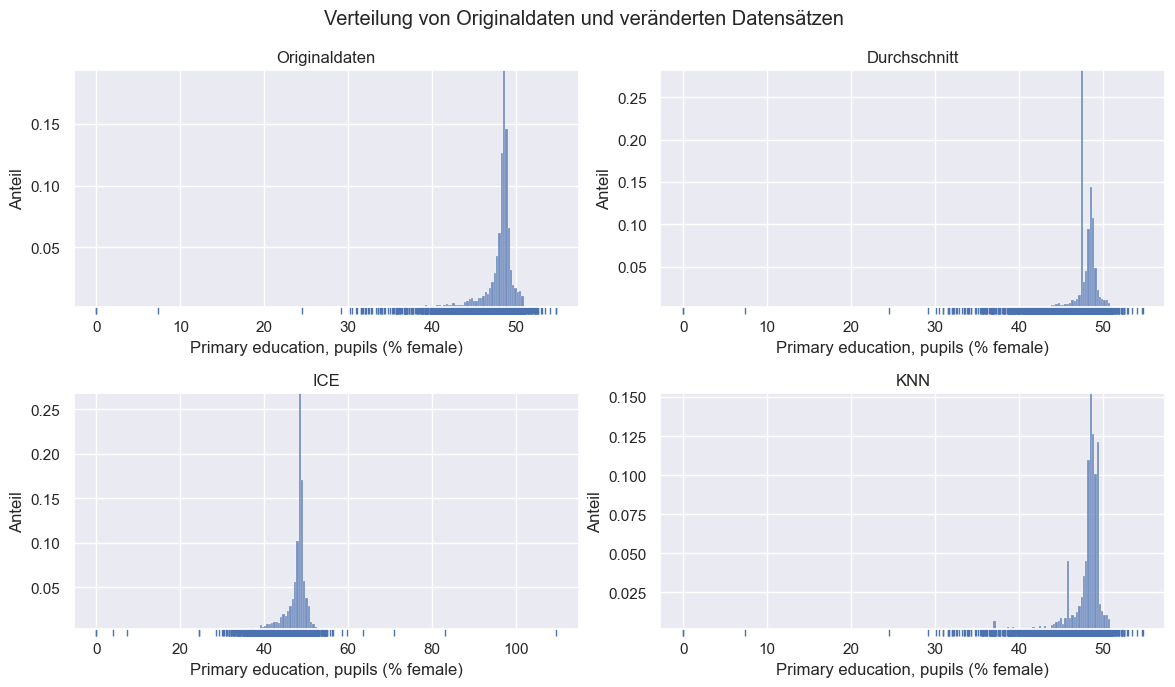

In [102]:
x='Primary education, pupils (% female)'
sns.set_theme()

df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=200, stat='proportion', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
ax2.set_title('Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=200, stat='proportion', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
ax3.set_title('ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=200, stat='proportion', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
ax4.set_title('KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/density_education')

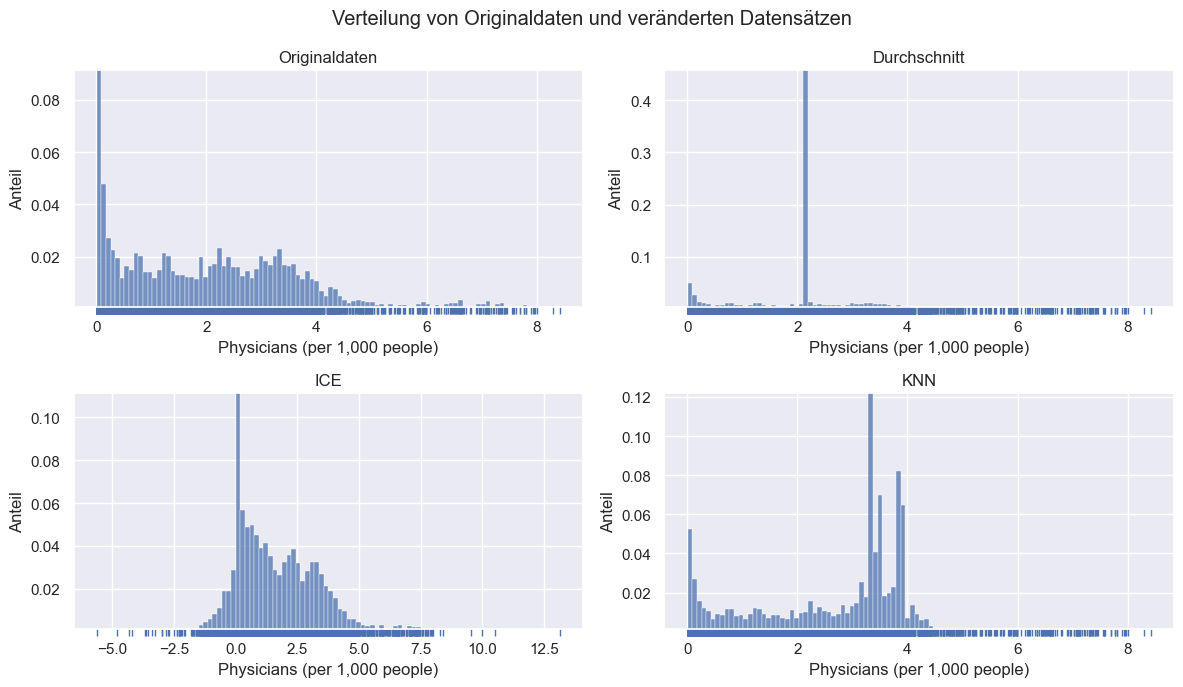

In [100]:
x='Physicians (per 1,000 people)'
sns.set_theme()

df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=100, stat='proportion', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=100, stat='proportion', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
ax2.set_title('Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=100, stat='proportion', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
ax3.set_title('ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=100, stat='proportion', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
ax4.set_title('KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/density_phyicians')